Scraping Data

In [ ]:
!pip install google-play-scraper

In [ ]:
from google_play_scraper import app

import pandas as pd

import numpy as np

In [ ]:
from google_play_scraper import Sort, reviews_all

result = reviews_all(
    'com.pinterest',
    sleep_milliseconds=0,
    lang='id',
    country='id',
    sort=Sort.NEWEST,
)

In [ ]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

In [ ]:
len(df_busu.index)

In [ ]:
df_busu[['userName', 'score','at', 'content']].head()

In [ ]:
new_df = df_busu[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False)
sorted_df.head()

In [ ]:
my_df = sorted_df[['userName', 'score','at', 'content']]

In [ ]:
my_df.head()

In [ ]:
my_df.to_csv("scrapped_data.csv", index = False)

Label Data Sesuai Rating

In [ ]:
import csv

def klasifikasi_sentimen(bintang):
    if bintang == '1' or bintang == '2':
        return 'Negatif'
    elif bintang == '3':
        return 'Netral'
    elif bintang == '4' or bintang == '5':
        return 'Positif'
    else:
        return 'Tidak Valid'

def baca_csv(nama_file):
    ulasan = []
    with open(nama_file, 'r', encoding='utf-8') as file_csv:
        reader = csv.DictReader(file_csv)
        for row in reader:
            bintang = row['score']
            ulasan_teks = row['content']
            dated = row['at']
            sentimen = klasifikasi_sentimen(bintang)
            ulasan.append((bintang, sentimen, ulasan_teks, dated))
    return ulasan

def tulis_csv(nama_file, ulasan):
    with open(nama_file, 'w', newline='', encoding='utf-8') as file_csv:
        writer = csv.writer(file_csv)
        writer.writerow(['dated','rating', 'label', 'review'])
        for bintang, sentimen, ulasan_teks, dated in ulasan:
            writer.writerow([dated, bintang, sentimen, ulasan_teks])

def main():
    nama_file_input = 'scrapped_data.csv'
    nama_file_output = 'pinterest.csv'

    ulasan = baca_csv(nama_file_input)

    tulis_csv(nama_file_output, ulasan)

    print("Hasil klasifikasi telah disimpan dalam file:", nama_file_output)

if __name__ == "__main__":
    main()


Hasil klasifikasi telah disimpan dalam file: hALO.csv


Lihat Banyak Data

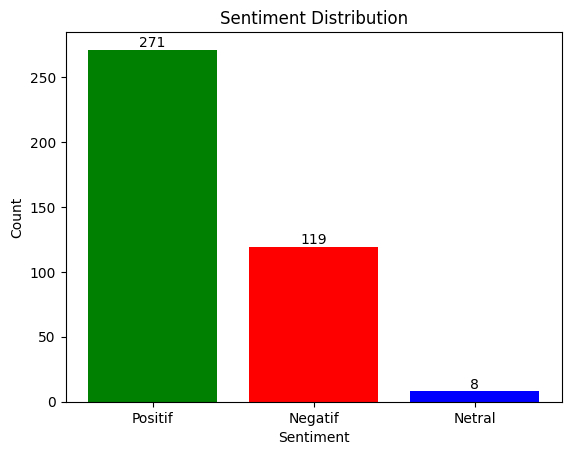

In [ ]:
import pandas as pd

df = pd.read_csv('pinterest.csv')

positive_count = df[df['label'] == 'Positif'].shape[0]
negative_count = df[df['label'] == 'Negatif'].shape[0]
neutral_count = df[df['label'] == 'Netral'].shape[0]

import matplotlib.pyplot as plt

labels = ['Positif', 'Negatif', 'Netral']
counts = [positive_count, negative_count, neutral_count]

plt.bar(labels, counts, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')

for i in range(len(labels)):
    plt.text(labels[i], counts[i], str(counts[i]), ha='center', va='bottom')

plt.show()


Bagi data

In [ ]:
import pandas as pd

df = pd.read_csv('pinterest.csv')

positive_comments = df[df['label'] == 'Positif']
negative_comments = df[df['label'] == 'Negatif']

min_count = min(len(positive_comments), len(negative_comments))
balanced_positive_comments = positive_comments.tail(min_count)
balanced_negative_comments = negative_comments.tail(min_count)

balanced_df = pd.concat([balanced_positive_comments, balanced_negative_comments])

sorted_df = balanced_df.sort_values(by='dated', ascending=False)

sorted_df.to_csv('pinterest_rata.csv', index=False)

print("Data telah disimpan ke dalam file")


Data telah disimpan ke dalam file


Cek Data Jumlah Sama

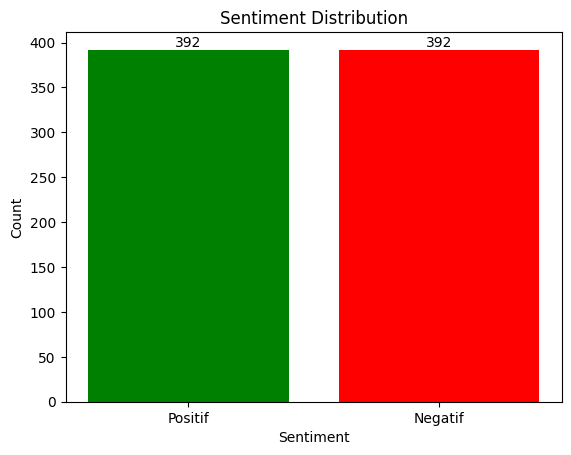

In [ ]:
import pandas as pd

df = pd.read_csv('pinterest_rata.csv')

positive_count = df[df['label'] == 'Positif'].shape[0]
negative_count = df[df['label'] == 'Negatif'].shape[0]

import matplotlib.pyplot as plt

labels = ['Positif', 'Negatif']
counts = [positive_count, negative_count]

plt.bar(labels, counts, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')

for i in range(len(labels)):
    plt.text(labels[i], counts[i], str(counts[i]), ha='center', va='bottom')
plt.show()
